In [28]:
import os, sys
import time
import datetime
import pandas as pd
import numpy as np
import math
from math import radians, cos, sin, asin, sqrt 
import random


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Ellipse, Circle

ROOTDIR = os.path.abspath(os.path.realpath('./')) + '/Py'

sys.path.append(os.path.join(ROOTDIR, ''))

import dgckernel

import geopandas as gp
import shapely

In [29]:
Load_path='./Data/Matching_prob/'

Request_data=pd.read_csv(os.path.join(Load_path,'Request_data.csv'))

Request_data=Request_data.drop(columns=['Unnamed: 0'])

Driver_data=pd.read_csv(os.path.join(Load_path,'Driver_data.csv'))

Driver_data=Driver_data.drop(columns=['Unnamed: 0'])

In [30]:
Matching_data=Driver_data.groupby(['Location_id','step']).count()[['Driver_id']]

Matching_data['Transition']=Matching_data.index

Matching_data['Location_id']=Matching_data.apply(lambda x:x['Transition'][0],axis=1)

Matching_data['step']=Matching_data.apply(lambda x:x['Transition'][1],axis=1)

Matching_data=Matching_data.reset_index(drop=True)

Matching_data=Matching_data.rename(index=str, columns={"Driver_id": "Driver_Cnt"})

Matching_data=Matching_data[['Location_id','step','Driver_Cnt']]

Success_data=Driver_data.loc[Driver_data['Order_id']!=-1].groupby(['Location_id','step']).count()[['Driver_id']]

Success_data['Transition']=Success_data.index

Success_data['Location_id']=Success_data.apply(lambda x:x['Transition'][0],axis=1)

Success_data['step']=Success_data.apply(lambda x:x['Transition'][1],axis=1)

Success_data=Success_data.reset_index(drop=True)

Success_data=Success_data.rename(index=str, columns={"Driver_id": "Success_Cnt"})

Success_data=Success_data[['Location_id','step','Success_Cnt']]

Matching_data=Matching_data.merge(Success_data,on=['Location_id','step'])

Matching_data['Prob']=Matching_data.apply(lambda x:x['Success_Cnt']/x['Driver_Cnt'],axis=1)

'''Order'''

Request_data=Request_data.groupby(['Pickup_Location','Pickup_step']).count()[['Order_id']]

Request_data['Transition']=Request_data.index

Request_data['Location_id']=Request_data.apply(lambda x:x['Transition'][0],axis=1)

Request_data['step']=Request_data.apply(lambda x:x['Transition'][1],axis=1)

Request_data=Request_data.reset_index(drop=True)

Request_data=Request_data.rename(index=str, columns={"Order_id": "Order_Cnt"})

Request_data=Request_data[['Location_id','step','Order_Cnt']]

'''Table'''

Matching_data=Matching_data.merge(Request_data,on=['Location_id','step'])

Matching_data['ratio']=Matching_data.apply(lambda x:x['Order_Cnt']/x['Driver_Cnt'],axis=1)

Matching_data=Matching_data[['ratio','Prob']]

Matching_data.to_csv(os.path.join(Load_path,'Matching_data.csv'))



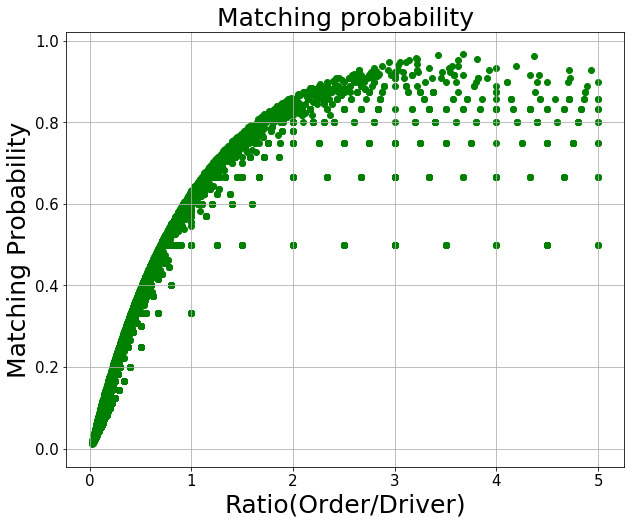

In [31]:
Matching_data=pd.read_csv(os.path.join(Load_path,'Matching_data.csv'))

Matching_data=Matching_data.drop(columns=['Unnamed: 0'])

figsize = 10,8

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(15) for label in labels]

ax1.scatter(Matching_data.loc[Matching_data['ratio']<=5,'ratio'],Matching_data.loc[Matching_data['ratio']<=5,'Prob'],color='g')

ax1.set_title('Matching probability',size=25) 

ax1.set_ylabel('Matching Probability',size=25) 

ax1.set_xlabel('Ratio(Order/Driver)',size=25)


plt.grid()

plt.show()